# Graficas para Reporte

In [82]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('women_violence_eco.csv')

In [4]:
df.head()

,Unnamed: 0,RPI_FGM_ATT,RPI_FGM_LAW,RPI_FGM_PRACT,RPI_MW_PRACT,RPI_RA_LAW,RPI_RA_PRACT,RPI_VAW_ATT,RPI_VAW_LAW,RPI_VAW_PRACT,...,PPPEX,PPPSH,TM_RPCH,TX_RPCH,Region_encode,Loc_encode,Inc_ordinal,LOCATION,Income,Region
0,0,0.0,1.00,0.0,100.6,0.00,38.0,25.2,0.75,34.8,...,139.415,0.164,-11.380,-5.925,0,1,2,AGO,LWI,AFR
1,1,0.0,0.00,0.0,101.2,0.75,29.7,72.9,0.50,46.7,...,615.481,0.007,45.588,-15.813,0,10,1,BDI,LOI,AFR
2,2,3.4,0.25,9.2,103.1,0.50,33.1,36.0,0.50,68.6,...,208.557,0.030,-8.378,-12.058,0,12,1,BEN,LOI,AFR
3,3,9.3,0.25,75.8,103.5,0.50,29.1,43.5,0.75,11.5,...,203.083,0.034,-2.652,-0.052,0,13,1,BFA,LOI,AFR
4,4,0.0,0.00,0.0,102.1,0.25,9.6,0.0,0.75,0.0,...,4.547,0.029,11.939,-7.091,0,26,3,BWA,UMI,AFR


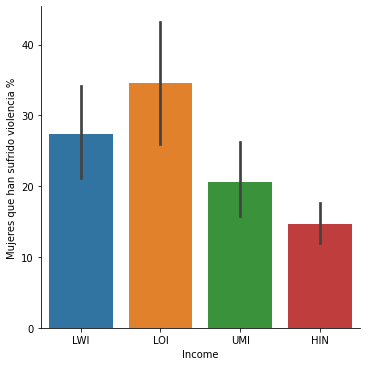

In [174]:
fig= sns.catplot(x="Income", y="RPI_VAW_PRACT", kind="bar", data=df)
plt.ylabel("Mujeres que han sufrido violencia %")
fig.savefig('mujeres_violentadas')

In [135]:
df.groupby('Region')['RPI_VAW_ATT'].mean()

Region
AFR    41.668750
AME    10.775000
ASI    27.369048
EUR     7.610526
Name: RPI_VAW_ATT, dtype: float64

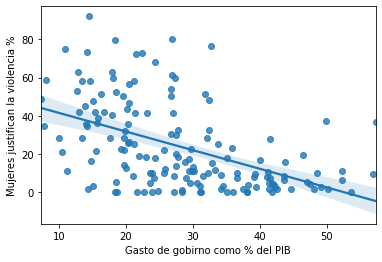

In [175]:
fig2= sns.regplot(x="GGR_NGDP", y="RPI_VAW_ATT", data=df)
plt.xlabel("Gasto de gobirno como % del PIB")
plt.ylabel("Mujeres justifican la violencia %")
plt.savefig('violencia_justificada')

In [78]:
LP_dir = {0:'Total_Protection',
            0.25:'Protection',
            0.5: 'Protection_Exep',
            0.75:'Some_protection',
          1:'No_Protection' }
df['Law-protec'] = df.RPI_VAW_LAW.map(LP_dir)

<Figure size 360x1080 with 0 Axes>

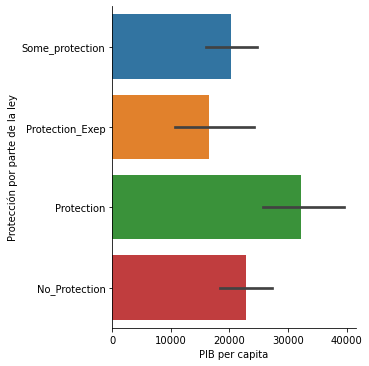

In [173]:
plt.figure(figsize=(5,15))
sns.catplot(y="Law-protec", x="NGDPRPPPPC", kind="bar", data=df)
plt.xlabel("PIB per capita")
plt.ylabel("Protección por parte de la ley")
plt.savefig('proteccion_leyes')

In [145]:
rep_dir = {0:'Total_Protection',
            0.25:'Protection',
            0.5: 'Protection_Exep',
            0.75:'Some_protection',
          1:'No_Protection' }
df['reprod'] = df.RPI_RA_LAW.map(rep_dir)

<Figure size 1440x1080 with 0 Axes>

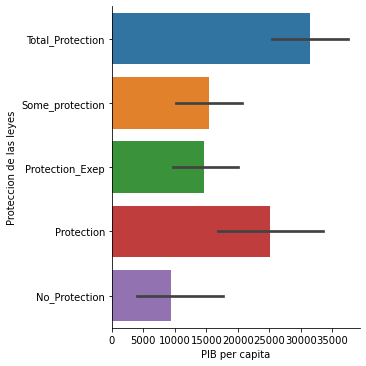

In [171]:
plt.figure(figsize=(20,15))
sns.catplot(y="reprod", x="NGDPRPPPPC", kind="bar", data=df)
plt.ylabel("Proteccion de las leyes")
plt.xlabel("PIB per capita")
plt.savefig('proteccion_leyes_rep')

<Figure size 360x360 with 0 Axes>

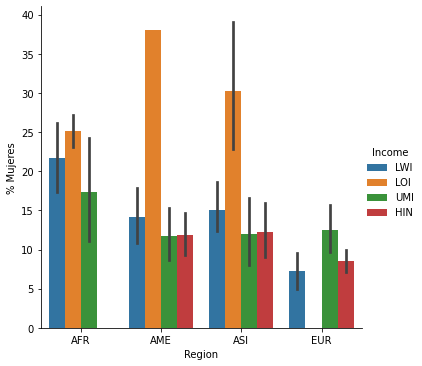

In [169]:
plt.figure(figsize=(5,5))
sns.catplot(x="Region", y="RPI_RA_PRACT", kind="bar", hue='Income', data=df)
plt.ylabel("% Mujeres")
plt.savefig('salud_reproductiva')

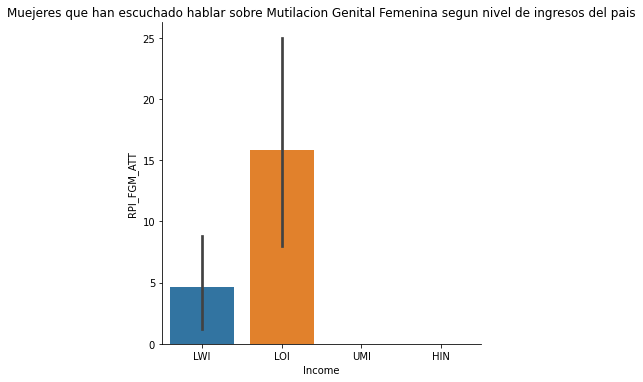

In [6]:

sns.catplot(x="Income", y="RPI_FGM_ATT", kind="bar", data=df).set(title='Muejeres que han escuchado hablar sobre Mutilacion Genital Femenina segun nivel de ingresos del pais')